# SVM

In [2]:
# -*- coding: utf-8 -*-
# リスト 3-11 iris データ（花弁の長さ・幅）を SVM で分類
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [3]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # irisデータのうち花弁の長さと花弁の幅のみ使うことにする
y = iris.target

In [4]:
h = .02               # メッシュのステップサイズ
C = 1.0               # SVMのコストパラメータ（大きいほど誤分類を許さない）
svc = svm.SVC(kernel='linear', C=C).fit(X, y)               # SVCクラスでlinearを選択
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)   # SVCクラスでrbfを選択
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)  # SVCクラスでpolyを選択
lin_svc = svm.LinearSVC(C=C).fit(X, y)                     # LinearSVCクラス
 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

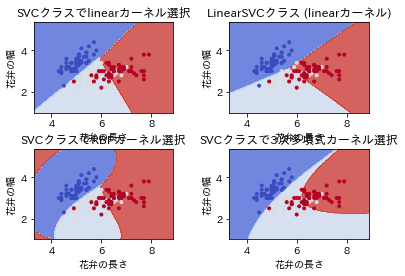

In [5]:
titles = ['SVCクラスでlinearカーネル選択',
          'LinearSVCクラス (linearカーネル)',
          'SVCクラスでRBFカーネル選択',
          'SVCクラスで3次多項式カーネル選択']
 
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    plt.subplot(2, 2, i + 1)  # 4面作る
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # 区分ごとの色分けを等高線で描画
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    # 教師データを重ねてプロット
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, marker='.')
    plt.xlabel('花弁の長さ')
    plt.ylabel('花弁の幅')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(titles[i])
plt.show()